In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('dark_background')

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y = make_blobs(n_features=1,centers=2)

In [4]:
y = y.reshape((-1,1))
y.shape

(100, 1)

In [5]:
#x = (m,1) y = (m,1)
x.shape, y.shape

((100, 1), (100, 1))

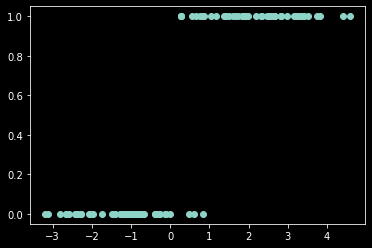

In [6]:
plt.scatter(x,y)

In [7]:
def draw_line(x,y,y_hat,w1,b1):
    plt.plot(x,y_hat, 'bo')
    plt.plot(x,w1 * x + b1, 'go')
    plt.plot(x,y,'ro')
    plt.show()

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
#f(x) = wx + b
def initialize_parameters(n,n_1):
    w1 = np.random.rand(n,n_1) * 0.001
    b1 = np.zeros((n,1))
    parameters = {'w1' : w1, 'b1':b1}
    return parameters


In [10]:
def feedforward(x,parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    # w1  = (n+1,n) , x = (m,n)
    # z1 = (na,n)*(n,m) = (1,m)
    z1 = np.dot(w1,x.T) + b1
    a1 = sigmoid(z1) # (1,m)
    cache = (x,a1,z1,parameters)
    return cache

In [11]:
parameters = initialize_parameters(1,1)

In [12]:
cache = feedforward(x,parameters)
print([x.shape for x in cache[:-1]])

[(100, 1), (1, 100), (1, 100)]


In [13]:
def compute_cost(y,a1):
    loss = -(y * np.log(a1) + (1 - y) * np.log(1 - a1)) # (m,1) , (1,m)
    cost = np.sum(loss)
    return cost

In [14]:
def backprop(y,cache):
    x,a1,z1,_ = cache
    
    dz1 = a1 - y # (1,m) - (m,1)
    dw1 = np.dot(dz1,x) # (1,m) * (m,1) -> (1,1)
    db1 = np.sum(dz1,keepdims=True,axis = 1)
    graidents = {'dw1' : dw1, 'db1': db1}
    return graidents

In [18]:
def optimizer(x,y,parameters, learning_rate = 0.001, epochs = 10):
    costs = []
    w1,b1 = parameters['w1'], parameters['b1']
    for i in range(epochs):
        cache = feedforward(x,parameters)
        cost = compute_cost(y.T,cache[1])
        graidents = backprop(y.T,cache)
        print(graidents['dw1'].shape)
        print(w1.shape)
        w1 = w1 - learning_rate * graidents['dw1']
        b1 = b1 - learning_rate * graidents['db1']
        parameters['w1'] = w1
        parameters['b1'] = b1
        
        if i % 2 == 0:
            print(f"Epoch number:{i+1} with cost: {cost}")
            print(w1,b1)
            #predict 1 if y >= 0.5 else 0.
            pred = cache[1].T
            pred[pred >= 0.5] = 1
            pred[pred < 0.5] = 0
            #draw a line
            draw_line(x,y,pred,w1,b1)
            
        costs.append(cost)
    return costs, parameters
#Update parameters

(1, 1)
(1, 1)
Epoch number:1 with cost: 69.26738748111177
[[0.08791013]] [[-5.78319086e-06]]


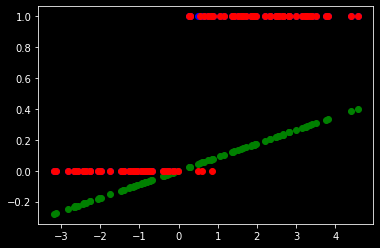

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:3 with cost: 56.26513861788498
[[0.23595301]] [[-0.00263353]]


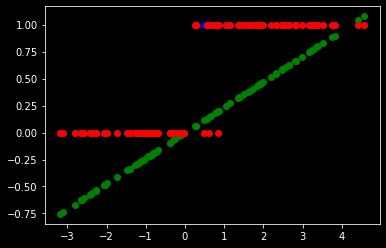

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:5 with cost: 47.80441591544798
[[0.35633011]] [[-0.00774272]]


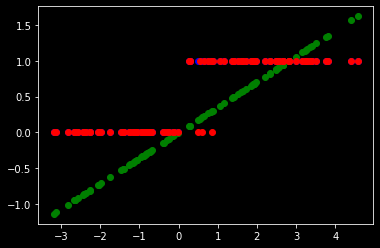

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:7 with cost: 42.02320041250125
[[0.45674844]] [[-0.01438737]]


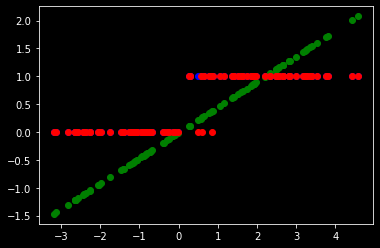

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:9 with cost: 37.863562225100914
[[0.54257204]] [[-0.02195758]]


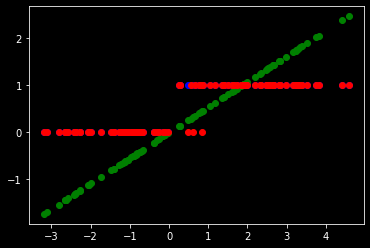

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:11 with cost: 34.73428462575185
[[0.61742804]] [[-0.0300784]]


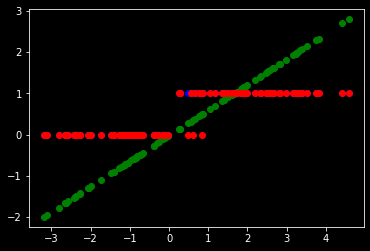

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:13 with cost: 32.29296097897071
[[0.68380508]] [[-0.03851791]]


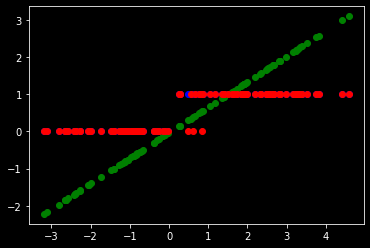

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:15 with cost: 30.331564932811844
[[0.74345703]] [[-0.04712953]]


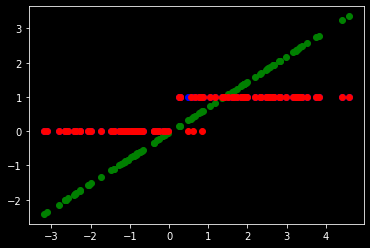

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:17 with cost: 28.71768931077524
[[0.79765544]] [[-0.0558184]]


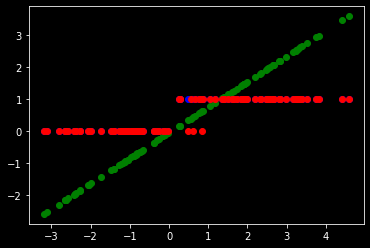

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:19 with cost: 27.363480882138468
[[0.84734684]] [[-0.06452189]]


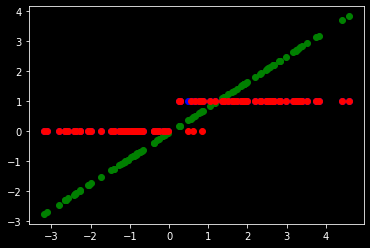

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:21 with cost: 26.208504324606285
[[0.89325265]] [[-0.07319794]]


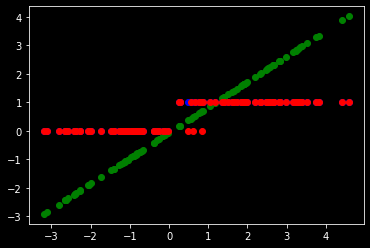

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:23 with cost: 25.2098690775356
[[0.93593431]] [[-0.08181806]]


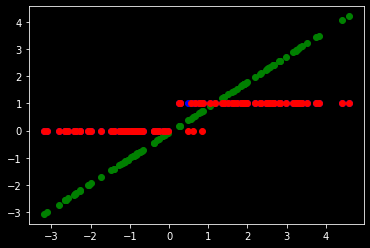

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:25 with cost: 24.336304957658207
[[0.97583678]] [[-0.09036284]]


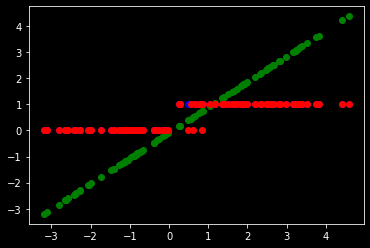

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:27 with cost: 23.5644745034977
[[1.01331844]] [[-0.09881909]]


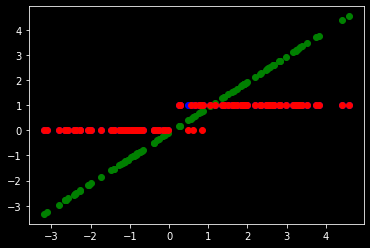

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:29 with cost: 22.876601327728608
[[1.04867203]] [[-0.10717802]]


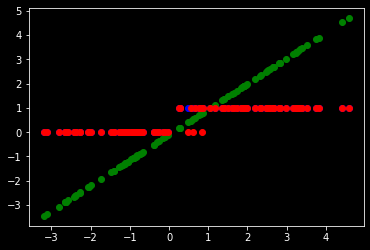

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:31 with cost: 22.258899884397472
[[1.08213975]] [[-0.11543386]]


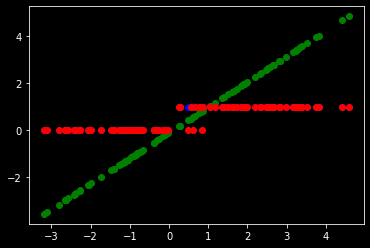

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:33 with cost: 21.70050862718041
[[1.11392417]] [[-0.1235831]]


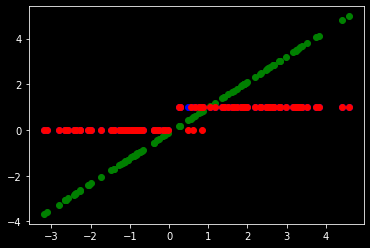

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:35 with cost: 21.192748274665718
[[1.14419649]] [[-0.13162379]]


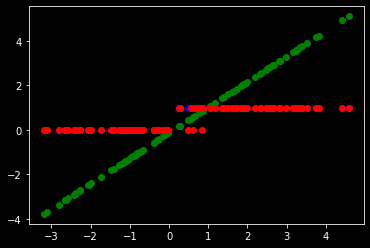

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:37 with cost: 20.72859535161584
[[1.17310265]] [[-0.13955514]]


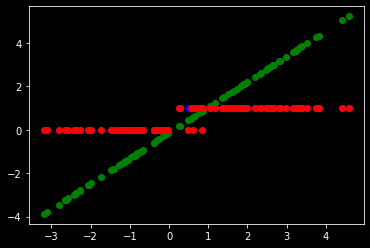

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:39 with cost: 20.302301523337732
[[1.20076812]] [[-0.14737722]]


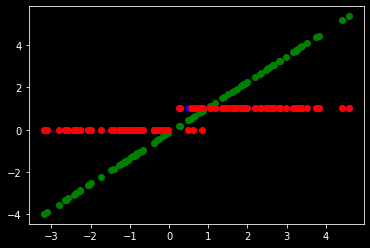

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:41 with cost: 19.909113694900498
[[1.22730153]] [[-0.1550907]]


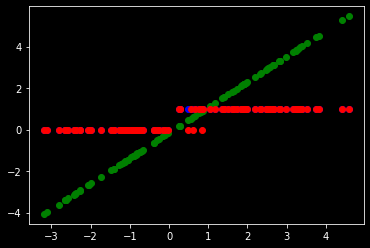

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:43 with cost: 19.54506504989603
[[1.2527976]] [[-0.1626967]]


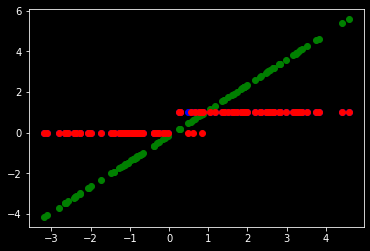

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:45 with cost: 19.20681687635583
[[1.2773394]] [[-0.17019668]]


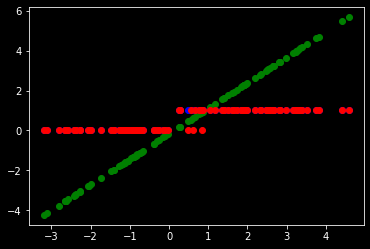

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:47 with cost: 18.89153731357329
[[1.30100022]] [[-0.17759232]]


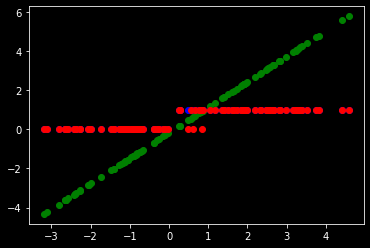

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:49 with cost: 18.596807318780638
[[1.32384504]] [[-0.18488545]]


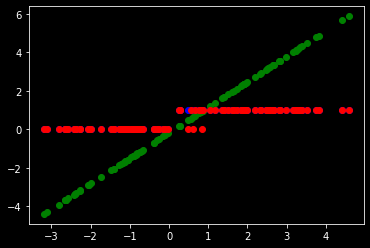

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:51 with cost: 18.320546962122418
[[1.34593176]] [[-0.19207802]]


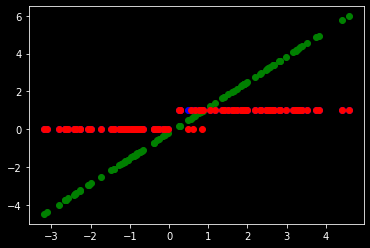

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:53 with cost: 18.060957084773236
[[1.36731219]] [[-0.19917205]]


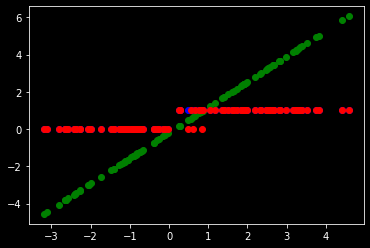

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:55 with cost: 17.816472696113834
[[1.38803289]] [[-0.2061696]]


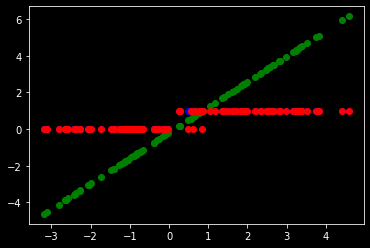

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:57 with cost: 17.58572543265358
[[1.40813586]] [[-0.21307274]]


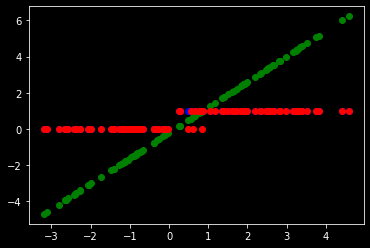

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:59 with cost: 17.367513078557646
[[1.42765913]] [[-0.21988352]]


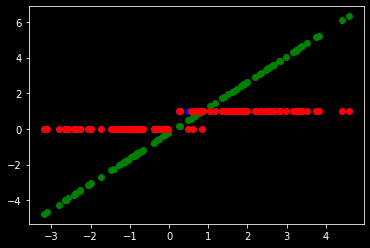

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:61 with cost: 17.160774637879413
[[1.44663722]] [[-0.226604]]


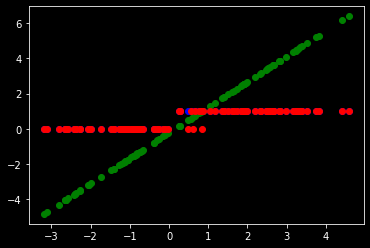

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:63 with cost: 16.96456980754442
[[1.4651016]] [[-0.23323621]]


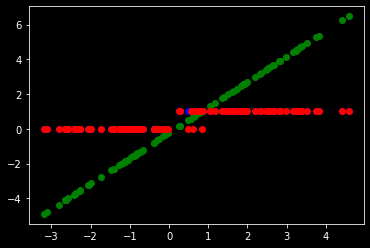

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:65 with cost: 16.778061965734103
[[1.48308103]] [[-0.23978212]]


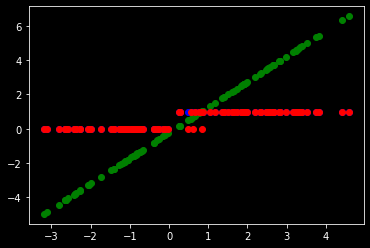

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:67 with cost: 16.600503988801062
[[1.50060185]] [[-0.24624371]]


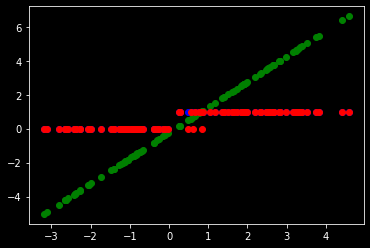

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:69 with cost: 16.431226359555723
[[1.51768826]] [[-0.25262286]]


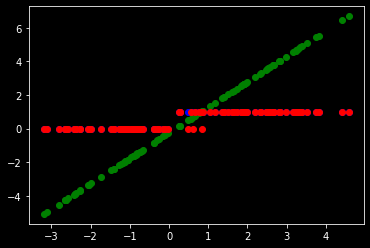

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:71 with cost: 16.26962714367105
[[1.53436257]] [[-0.25892145]]


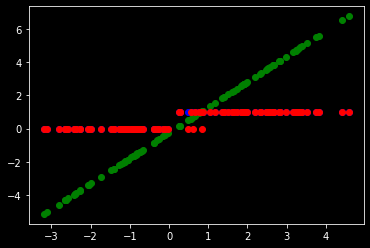

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:73 with cost: 16.115163498332738
[[1.55064535]] [[-0.26514129]]


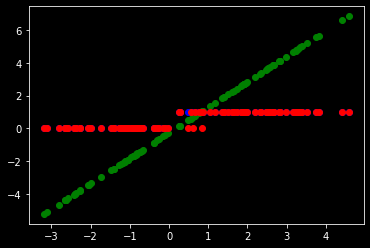

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:75 with cost: 15.9673444448156
[[1.56655564]] [[-0.27128415]]


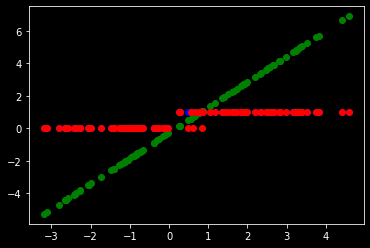

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:77 with cost: 15.825724689274088
[[1.58211108]] [[-0.27735176]]


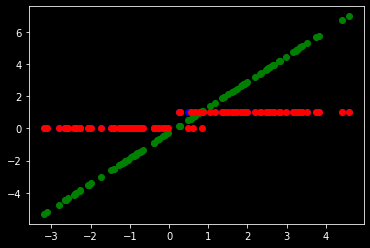

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:79 with cost: 15.689899317287392
[[1.59732806]] [[-0.28334577]]


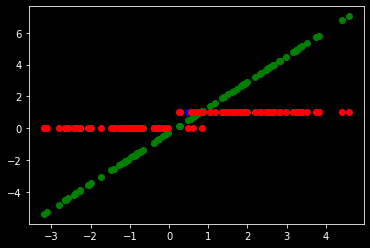

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:81 with cost: 15.559499220260983
[[1.61222184]] [[-0.28926783]]


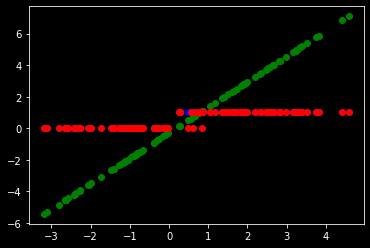

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:83 with cost: 15.434187137647474
[[1.62680664]] [[-0.2951195]]


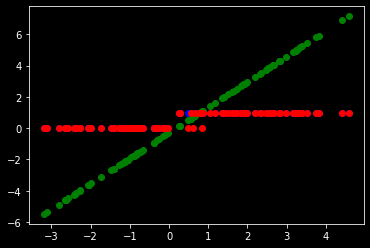

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:85 with cost: 15.313654219611088
[[1.64109574]] [[-0.30090232]]


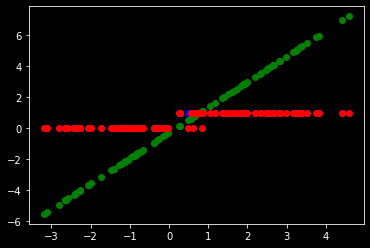

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:87 with cost: 15.197617031360219
[[1.65510156]] [[-0.30661778]]


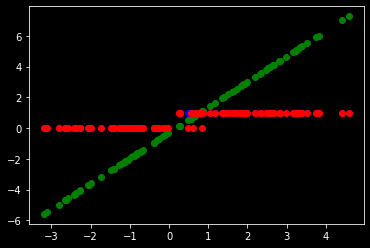

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:89 with cost: 15.08581493378082
[[1.66883572]] [[-0.31226731]]


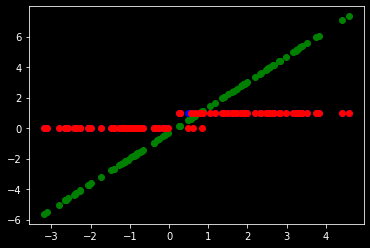

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:91 with cost: 14.978007785889538
[[1.68230916]] [[-0.31785232]]


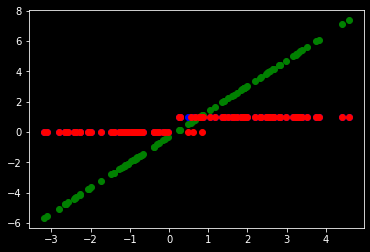

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:93 with cost: 14.873973923506217
[[1.69553211]] [[-0.32337417]]


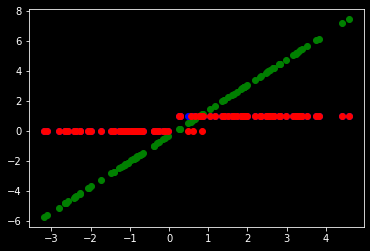

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:95 with cost: 14.773508375824619
[[1.70851423]] [[-0.32883418]]


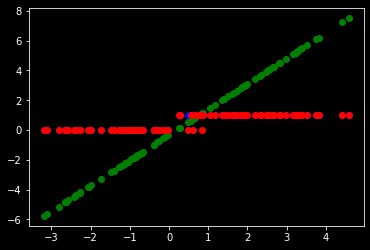

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:97 with cost: 14.676421287552705
[[1.72126459]] [[-0.33423361]]


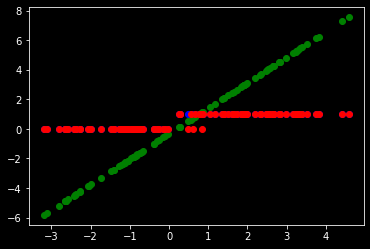

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:99 with cost: 14.582536519248428
[[1.73379178]] [[-0.33957372]]


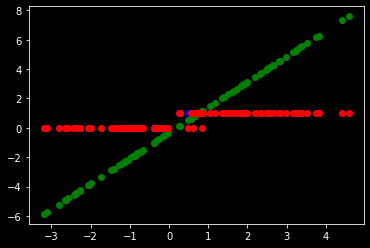

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:101 with cost: 14.491690402590022
[[1.74610387]] [[-0.34485571]]


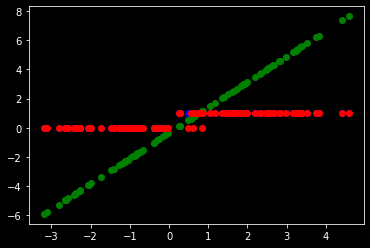

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:103 with cost: 14.40373063074763
[[1.75820852]] [[-0.35008075]]


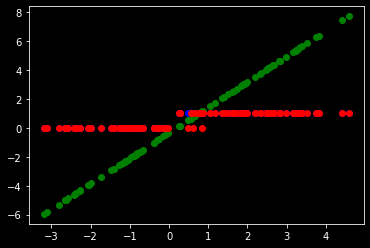

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:105 with cost: 14.318515266890488
[[1.77011296]] [[-0.35524998]]


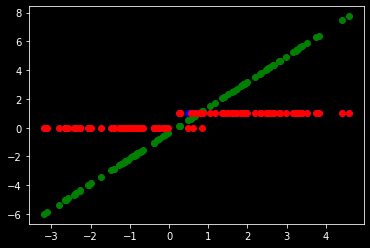

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:107 with cost: 14.235911856271391
[[1.78182405]] [[-0.36036449]]


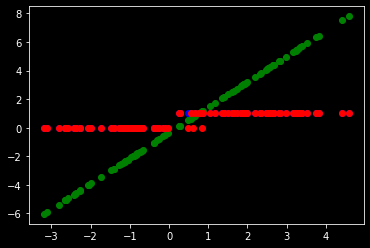

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:109 with cost: 14.155796629358218
[[1.79334829]] [[-0.36542536]]


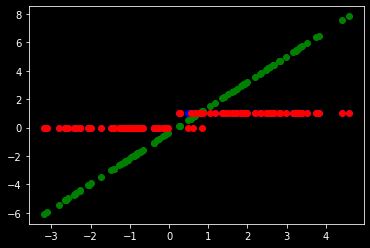

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:111 with cost: 14.078053785196547
[[1.80469184]] [[-0.37043362]]


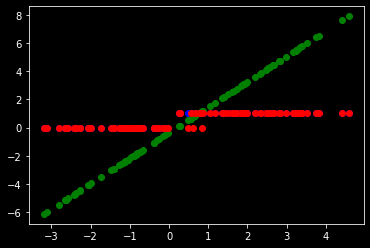

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:113 with cost: 14.002574845641288
[[1.81586057]] [[-0.37539029]]


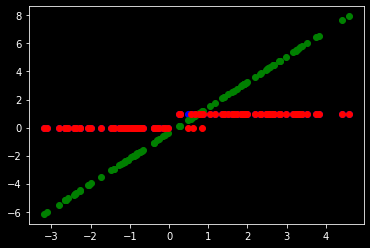

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:115 with cost: 13.92925807233142
[[1.82686006]] [[-0.38029635]]


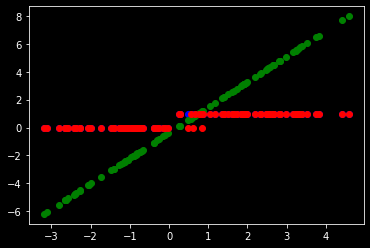

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:117 with cost: 13.858007939337206
[[1.83769561]] [[-0.38515275]]


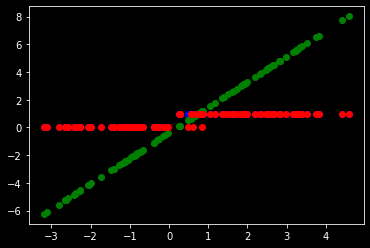

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:119 with cost: 13.788734655311549
[[1.84837227]] [[-0.38996042]]


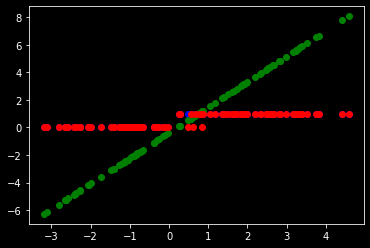

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:121 with cost: 13.721353729751659
[[1.85889486]] [[-0.39472027]]


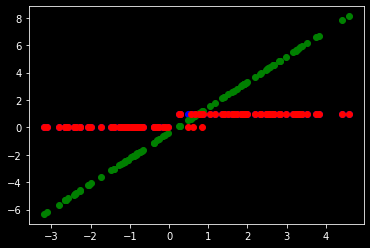

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:123 with cost: 13.655785578643213
[[1.86926798]] [[-0.39943316]]


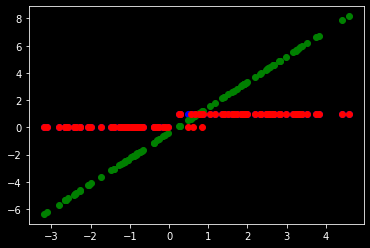

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:125 with cost: 13.591955165333964
[[1.87949601]] [[-0.40409996]]


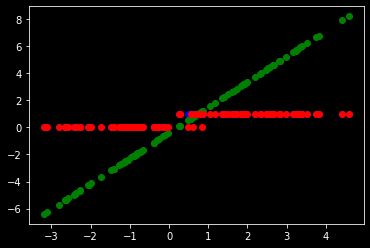

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:127 with cost: 13.529791672980155
[[1.88958316]] [[-0.40872148]]


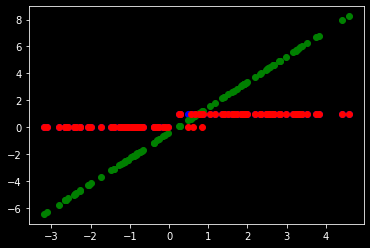

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:129 with cost: 13.469228205340052
[[1.89953344]] [[-0.41329855]]


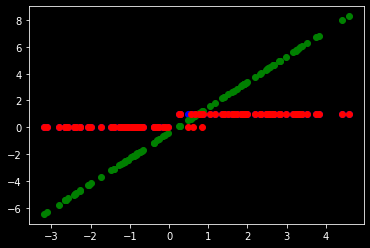

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:131 with cost: 13.41020151306269
[[1.90935067]] [[-0.41783194]]


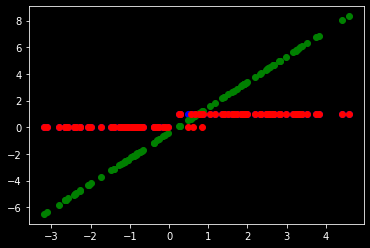

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:133 with cost: 13.352651742945648
[[1.91903853]] [[-0.42232243]]


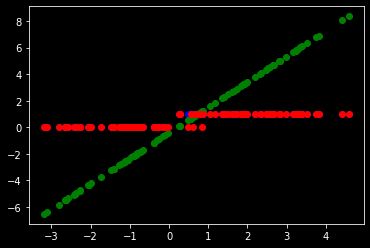

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:135 with cost: 13.296522207920118
[[1.92860055]] [[-0.42677076]]


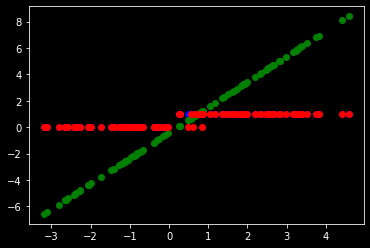

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:137 with cost: 13.241759175769682
[[1.9380401]] [[-0.43117765]]


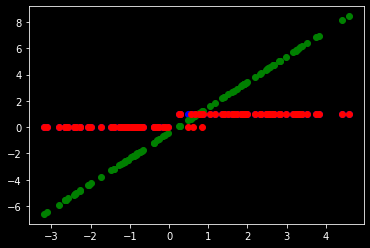

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:139 with cost: 13.188311674807423
[[1.94736042]] [[-0.43554381]]


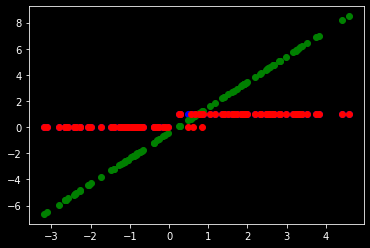

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:141 with cost: 13.136131314926953
[[1.95656461]] [[-0.43986993]]


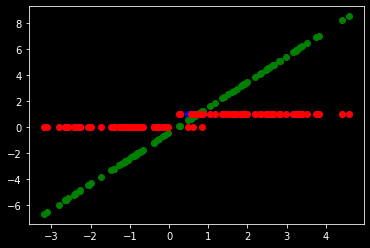

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:143 with cost: 13.085172122611278
[[1.96565567]] [[-0.44415669]]


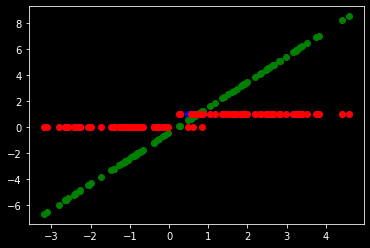

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:145 with cost: 13.03539038863178
[[1.97463646]] [[-0.44840473]]


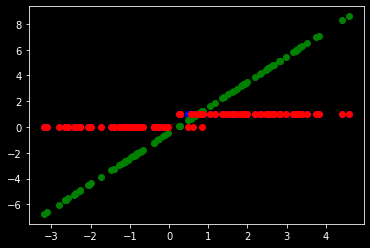

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:147 with cost: 12.986744527300427
[[1.98350973]] [[-0.45261471]]


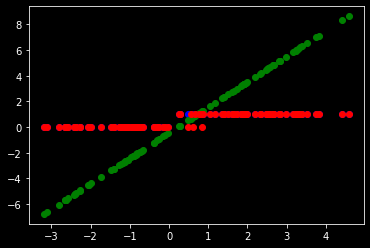

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:149 with cost: 12.939194946254277
[[1.99227815]] [[-0.45678724]]


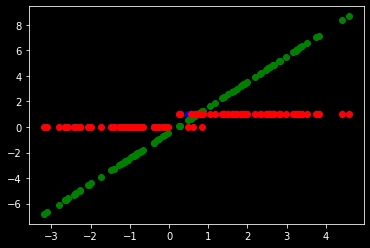

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:151 with cost: 12.892703925853912
[[2.00094426]] [[-0.46092292]]


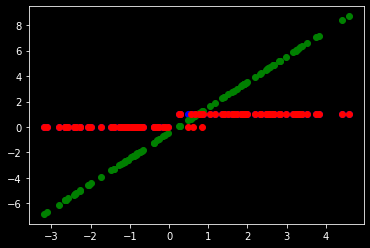

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:153 with cost: 12.847235507368545
[[2.00951054]] [[-0.46502236]]


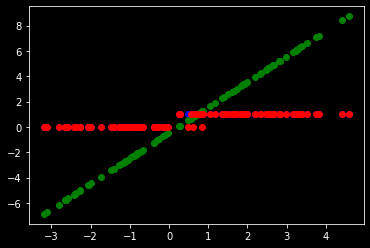

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:155 with cost: 12.802755389201732
[[2.01797933]] [[-0.46908613]]


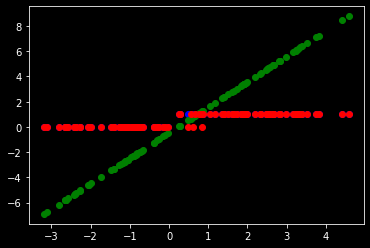

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:157 with cost: 12.759230830483444
[[2.02635294]] [[-0.4731148]]


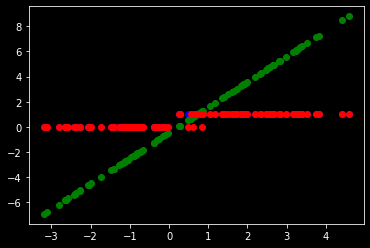

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:159 with cost: 12.716630561418901
[[2.03463357]] [[-0.47710892]]


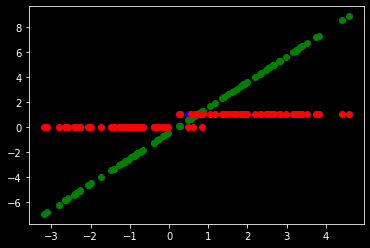

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:161 with cost: 12.674924699841878
[[2.04282333]] [[-0.48106902]]


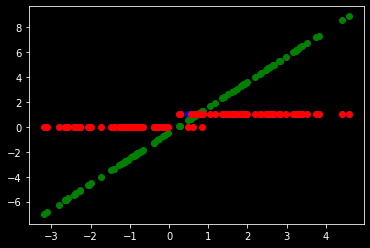

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:163 with cost: 12.634084673471653
[[2.05092429]] [[-0.48499564]]


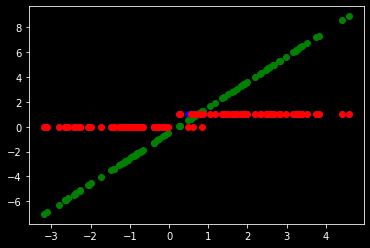

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:165 with cost: 12.594083147418786
[[2.05893842]] [[-0.48888929]]


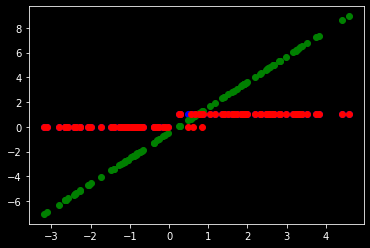

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:167 with cost: 12.554893956526296
[[2.06686764]] [[-0.49275046]]


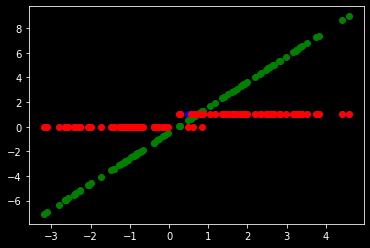

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:169 with cost: 12.516492042169881
[[2.07471379]] [[-0.49657966]]


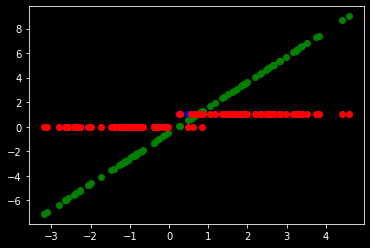

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:171 with cost: 12.478853393174203
[[2.08247868]] [[-0.50037736]]


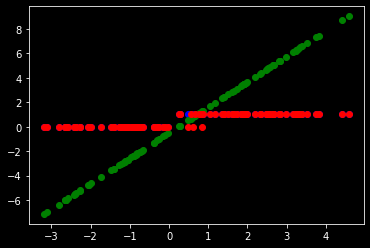

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:173 with cost: 12.441954990532366
[[2.09016402]] [[-0.50414403]]


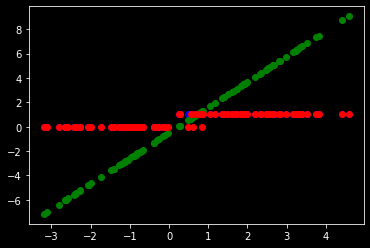

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:175 with cost: 12.405774755642794
[[2.09777149]] [[-0.50788012]]


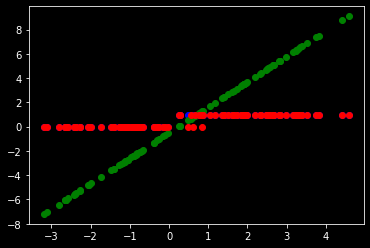

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:177 with cost: 12.3702915018022
[[2.10530271]] [[-0.5115861]]


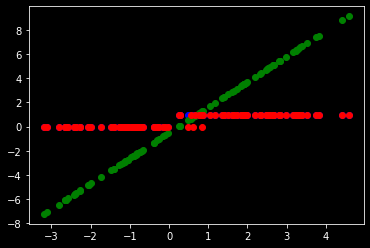

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:179 with cost: 12.335484888715559
[[2.11275925]] [[-0.51526239]]


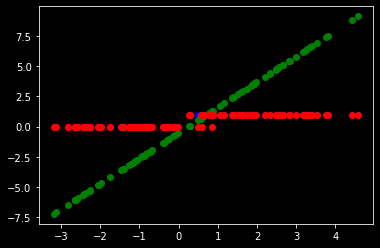

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:181 with cost: 12.301335379803875
[[2.12014264]] [[-0.51890942]]


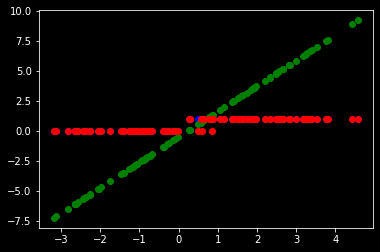

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:183 with cost: 12.267824202108837
[[2.12745433]] [[-0.52252762]]


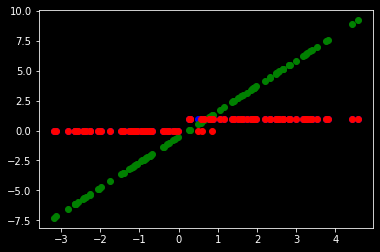

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:185 with cost: 12.234933308609852
[[2.13469577]] [[-0.5261174]]


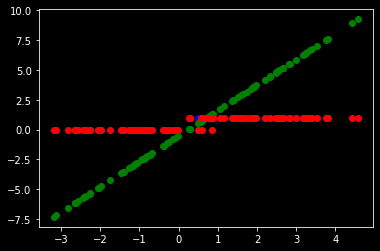

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:187 with cost: 12.2026453427839
[[2.14186834]] [[-0.52967915]]


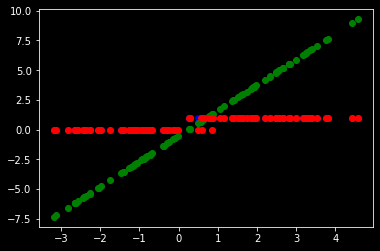

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:189 with cost: 12.170943605252264
[[2.14897337]] [[-0.53321327]]


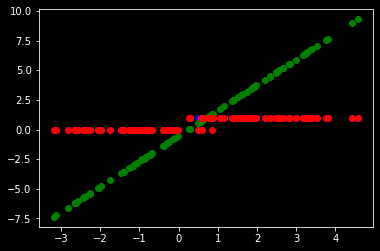

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:191 with cost: 12.139812022370597
[[2.15601217]] [[-0.53672016]]


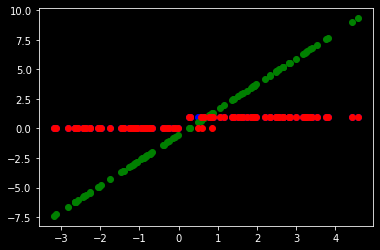

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:193 with cost: 12.109235116629982
[[2.16298601]] [[-0.54020017]]


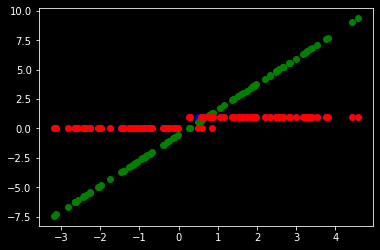

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:195 with cost: 12.079197978747008
[[2.16989612]] [[-0.54365369]]


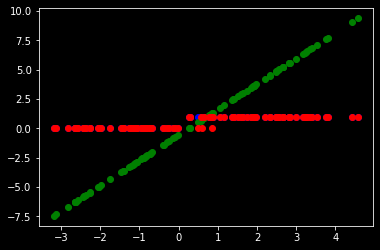

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:197 with cost: 12.049686241330205
[[2.17674368]] [[-0.54708108]]


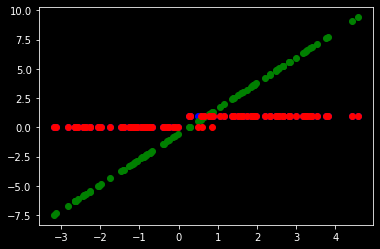

(1, 1)
(1, 1)
(1, 1)
(1, 1)
Epoch number:199 with cost: 12.020686054018793
[[2.18352985]] [[-0.55048269]]


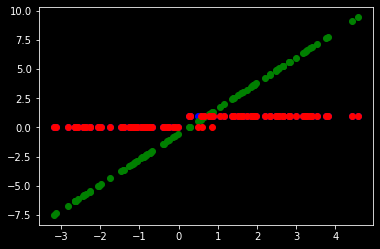

(1, 1)
(1, 1)


In [16]:
costs,parameters = optimizer(x,y,parameters, epochs=200)

In [65]:
# draw loss curves

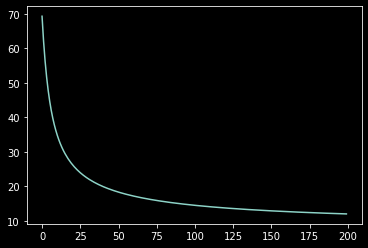

In [17]:
plt.plot(range(len(costs)),costs)